# Diffusion Monte Carlo Method

Description of theory and stuff

A diffusion monte carlo simulation for the 3-dimensional harmonic oscillator, ground state energy and wave function 

$$E_0 = \frac{2}{3}, \hspace{2em} \psi_0 = \frac{e^{-r^2/2}}{(2\pi)^{3/2}}$$

using $m=\omega=\hbar=1$

In [1]:
import numpy as np
import numpy.random as random

dim = 3

Potential of the harmonic oscillator in three dimensions

$$V(\mathbf x) = \frac{1}{2}\mathbf x ^2$$

In [2]:
def pot(x):
    return 0.5 * x.dot(x)

Set the time step size, the target number of walkers as well as the target number of time steps

In [3]:
dt = 0.05
N_T = 300
T_steps = 4000
alpha = 0.1

The first 20% of the time steps are used as thermalization steps, after that, the measured values are reset and the real simulation continues

In a timestep
1. Compute one DMC step on each walker
2. Remove dead walkers
3. Adjust $E_T$ to drive $N$ towards $N_T$
4. Accumulate data to measure $\left<E\right>$, its variance and the ground state wave function

In [10]:
# Initialize walkers
r = np.zeros((N_T, 3))
N = N_T
E_T = 0 # initial guess for the ground state energy

thermal_steps = int(0.2*T_steps)

# Initialize accumulators
E_sum = 0
E_squared_sum = 0
r_max = 4.0
N_psi = 100
psi = np.zeros((N_psi,))

# Time step
for i in range(thermal_steps+T_steps):
    if i % 100 == 0:
        print i, N
    
    N_0 = N
    
    r_new = np.zeros((0,3))
    
    # Diffusion step
    r += random.normal(size=(N_0,3)) * np.sqrt(dt)
    
    # Branching step
    #q = np.apply_along_axis(lambda x: np.exp(-dt * (pot(x) - E_T)), 1, r)
    
    q = np.zeros((N_0,))
    
    for j in range(N_0):
        # Branching
        q[j] = np.exp(-dt * (pot(r[j,:]) - E_T))
        
        if q[j] - int(q[j]) > random.uniform():
            count_new = int(q[j]) + 1
        else:
            count_new = int(q[j])
        for c in range(count_new):
            r_new = np.append(r_new,r[j:j+1,:],axis=0)
            
    N = r_new.shape[0s]
    r = r_new
    
    E_T += alpha * np.log(N_T / float(N))
    
    if i == thermal_steps:
        E_sum = 0
        E_squared_sum = 0
        psi = np.zeros((N_psi,))
        
    E_sum += E_T
    E_squared_sum += E_T**2
    
    for j in range(N):
        r_squared = r[j,:].dot(r[j,:])
        i_bin = int(np.sqrt(r_squared) / r_max * N_psi)
        if i_bin < N_psi:
            psi[i_bin] += 1
        

E_avg = E_sum/T_steps
E_var = E_squared_sum/T_steps - E_avg**2

print E_avg
print E_var
print psi

0 300
100 291
200 183
300 226
400 254
500 293
600 516
700 685
800 829
900 625
1000 215
1100 114
1200 128
1300 307
1400 567
1500 712
1600 710
1700 381
1800 231
1900 154
2000 179
2100 249
2200 361
2300 380
2400 314
2500 375
2600 292
2700 229
2800 179
2900 235
3000 333
3100 444
3200 418
3300 328
3400 175
3500 156
3600 206
3700 335
3800 533
3900 394
4000 322
4100 228
4200 163
4300 261
4400 419
4500 657
4600 513
4700 334
1.49575883505
0.472570568018
[  2.40000000e+01   1.90000000e+02   4.34000000e+02   8.66000000e+02
   1.37300000e+03   2.04000000e+03   2.82200000e+03   3.80300000e+03
   4.69400000e+03   5.92700000e+03   7.08600000e+03   8.24900000e+03
   9.73900000e+03   1.08460000e+04   1.23890000e+04   1.38920000e+04
   1.50960000e+04   1.68140000e+04   1.81280000e+04   1.97330000e+04
   2.14040000e+04   2.25250000e+04   2.40120000e+04   2.49190000e+04
   2.61270000e+04   2.74020000e+04   2.81520000e+04   2.90110000e+04
   2.96820000e+04   3.05250000e+04   3.12160000e+04   3.16570000e+04

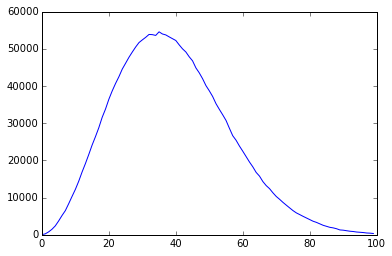

In [8]:
a = """3.90000000e+01   2.53000000e+02   7.80000000e+02   1.47600000e+03
   2.39600000e+03   3.71700000e+03   5.16500000e+03   6.49400000e+03
   8.35300000e+03   1.03010000e+04   1.22080000e+04   1.43960000e+04
   1.68700000e+04   1.91420000e+04   2.15770000e+04   2.41190000e+04
   2.63760000e+04   2.87790000e+04   3.15570000e+04   3.37930000e+04
   3.64260000e+04   3.86690000e+04   4.06720000e+04   4.24840000e+04
   4.45320000e+04   4.61140000e+04   4.77090000e+04   4.91220000e+04
   5.04690000e+04   5.16720000e+04   5.23950000e+04   5.30780000e+04
   5.38570000e+04   5.38050000e+04   5.35980000e+04   5.45640000e+04
   5.39860000e+04   5.37350000e+04   5.32180000e+04   5.27220000e+04
   5.22350000e+04   5.10670000e+04   4.99930000e+04   4.91500000e+04
   4.78540000e+04   4.67690000e+04   4.48690000e+04   4.35410000e+04
   4.19580000e+04   4.01090000e+04   3.87110000e+04   3.71870000e+04
   3.52550000e+04   3.37270000e+04   3.22670000e+04   3.07420000e+04
   2.86550000e+04   2.66440000e+04   2.54190000e+04   2.38670000e+04
   2.24720000e+04   2.10260000e+04   1.95710000e+04   1.82720000e+04
   1.67690000e+04   1.57730000e+04   1.43190000e+04   1.32270000e+04
   1.24010000e+04   1.12960000e+04   1.03050000e+04   9.54300000e+03
   8.72000000e+03   7.97000000e+03   7.23500000e+03   6.50700000e+03
   5.89300000e+03   5.43900000e+03   4.96800000e+03   4.53000000e+03
   4.08900000e+03   3.64900000e+03   3.34100000e+03   2.94800000e+03
   2.55700000e+03   2.28200000e+03   2.01200000e+03   1.86300000e+03
   1.63500000e+03   1.31000000e+03   1.24100000e+03   1.09900000e+03
   9.61000000e+02   8.83000000e+02   7.49000000e+02   6.77000000e+02
   6.07000000e+02   4.88000000e+02   4.42000000e+02   3.48000000e+02"""

a = a.split(" ")
a = [float(item) for item in a if item != '']

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(a)
plt.show()